<a href="https://colab.research.google.com/github/JionisGenius/ci-example/blob/main/0825_scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## scikit-learn을 활용한 머신러닝

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

In [ ]:
y

array([ 6,  8,  9, 11])

In [ ]:
reg = LinearRegression().fit(X, y)

In [ ]:
reg.score(X, y)

1.0

In [ ]:
reg.coef_

array([1., 2.])

In [ ]:
reg.intercept_

3.0000000000000018

In [ ]:
reg.predict(np.array([[3, 5]]))

array([16.])

## Tensorflow를 활용한 딥러닝

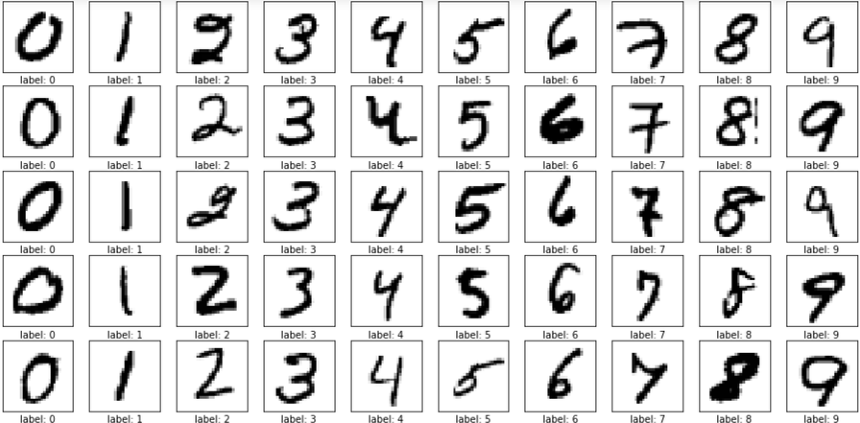

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2958 - accuracy: 0.9138
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1437 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9681
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0884 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0749 - accuracy: 0.9769
313/313 - 1s - loss: 0.0720 - accuracy: 0.9773 - 536ms/epoch - 2ms/step


[0.07202497869729996, 0.9772999882698059]

# 보스톤 집값을 예측하는 회귀(Regression) 모델

# 1. 학습데이터 준비



```
# 코드로 형식 지정됨
```

**scikit-learn이 제공하는 회귀 분석용 예제 데이터에 대해 소개한다. 먼저, 보스턴 주택 가격 데이터는 다음과 같이 구성되어 있다.**

* 타겟 데이터
    * 1978 보스턴 주택 가격
    * 506개 타운의 주택 가격 중앙값 (단위 1,000 달러)


* 특징 데이터
    * CRIM: 범죄율
    * INDUS: 비소매상업지역 면적 비율
    * NOX: 일산화질소 농도
    * RM: 주택당 방 수
    * LSTAT: 인구 중 하위 계층 비율
    * B: 인구 중 흑인 비율
    * PTRATIO: 학생/교사 비율
    * ZN: 25,000 평방피트를 초과 거주지역 비율
    * CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
    * AGE: 1940년 이전에 건축된 주택의 비율
    * RAD: 방사형 고속도로까지의 거리
    * DIS: 직업센터의 거리
    * TAX: 재산세율

In [ ]:
from sklearn.datasets import load_boston

datasets = load_boston()

print(dir(datasets))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(datasets.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 1-1. pandas로 변환 해보기

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(datasets.data, columns=datasets.feature_names)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# price column 생성 후 DataFrame에 가격 넣기
df = pd.DataFrame(datasets.data)
df.columns = datasets.feature_names
df['price'] = datasets.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1-3. 학습, 검증 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split

X = datasets.data

y = datasets.target #주택 가격


X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

print(X.shape, X_train.shape, X_test.shape)

(506, 13) (339, 13) (167, 13)


In [ ]:
#numpy로 변환하기
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

## 1-4. 정규화 하기


In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()

standardScaler.fit(X_train) # mean, std

X_scaling_train = standardScaler.transform(X_train)
X_scaling_test = standardScaler.transform(X_test)

## 1-5 LinearRegression 모델 구성 및 학습

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X_scaling_train, y_train)

LinearRegression()

In [ ]:
# 예측하기
prediction = linear_regression.predict(X_scaling_test)

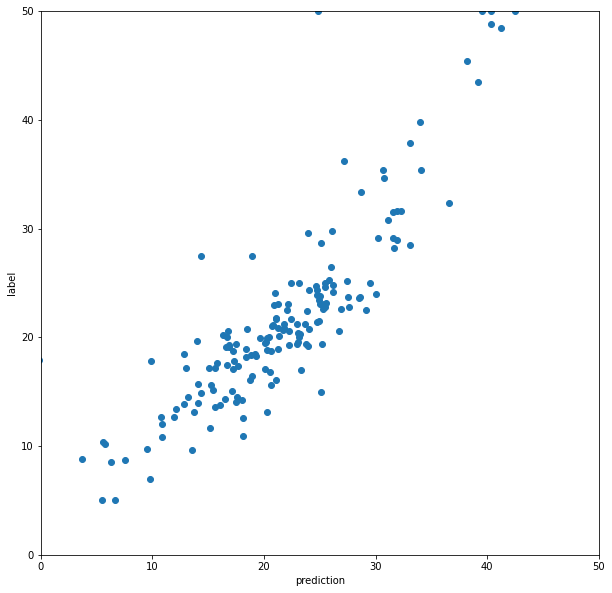

In [ ]:
#결과 시각화 하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.xlim(0, 50)
plt.ylim(0, 50)

plt.xlabel('prediction')
plt.ylabel('label')

plt.scatter(prediction, y_test)